Step1: Split the Data 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("resume_cleaned.csv")
# Define target variable (label)
X = df.drop(columns=["received_callback"])  #features(X)
y = df["received_callback"] #target variable(Y)

# Split into train and test 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Step2: Train the Model

classification_report: Shows precision, recall, f1-score

confusion_matrix: Visualizes True Positives, False Positives, etc

accuracy_score: Basic accuracy metric.

Accuracy: 0.9024640657084189

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       896
           1       0.10      0.03      0.04        78

    accuracy                           0.90       974
   macro avg       0.51      0.50      0.49       974
weighted avg       0.85      0.90      0.88       974



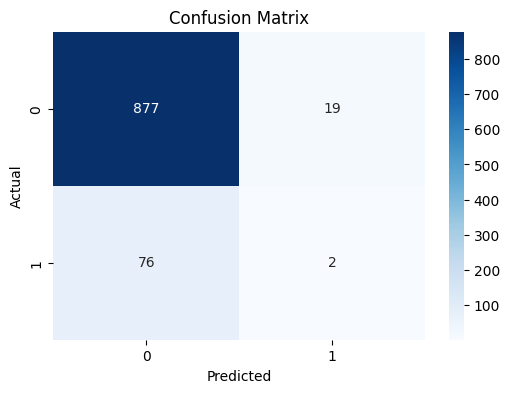

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# checking accuracy
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
#print(f"Model Accuracy: {accuracy:.4f}")

print("Accuracy:",accuracy)
print("\nClassification Report:\n", classification)

# Step 5: Confusion Matrix
plt.figure(figsize=(6, 4))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
import joblib
import os

os.makedirs("model",exist_ok=True) #creating directory folder if doesnt exist

#saving model and testsets
joblib.dump(model,"model/randomforest_model.pkl")
X_test.to_csv("../model/X_test.csv",index=False)
y_test.to_csv("../model/y_test.csv",index= False)

Other models comparison


======================= Logistic Regression =======================
Accuracy: 0.6211498973305954
              precision    recall  f1-score   support

           0       0.94      0.63      0.75       896
           1       0.11      0.54      0.19        78

    accuracy                           0.62       974
   macro avg       0.53      0.58      0.47       974
weighted avg       0.87      0.62      0.71       974



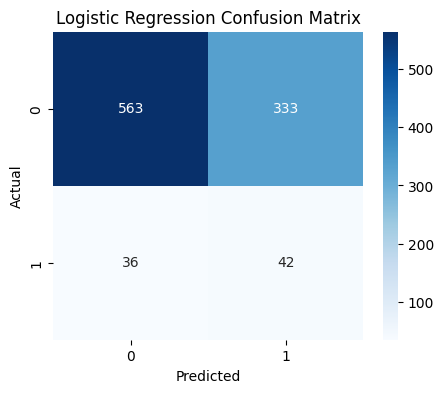


======================= Linear SVM =======================
Accuracy: 0.6540041067761807
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       896
           1       0.11      0.49      0.18        78

    accuracy                           0.65       974
   macro avg       0.53      0.58      0.48       974
weighted avg       0.87      0.65      0.73       974



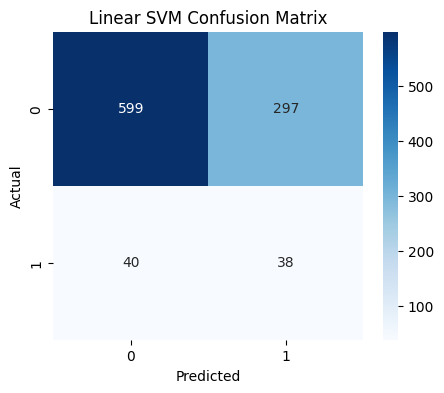


======================= Random Forest =======================
Accuracy: 0.9024640657084189
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       896
           1       0.10      0.03      0.04        78

    accuracy                           0.90       974
   macro avg       0.51      0.50      0.49       974
weighted avg       0.85      0.90      0.88       974



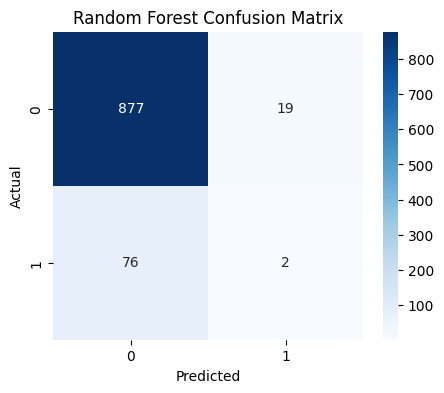


===================== MODEL COMPARISON =====================
                 Model  Accuracy
2        Random Forest  0.902464
1           Linear SVM  0.654004
0  Logistic Regression  0.621150


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n======================= {name} =======================")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

    # Save results
    results.append({"Model": name, "Accuracy": acc})

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
evaluate_model("Logistic Regression", lr_model, X_train, y_train, X_test, y_test)


# 2. Linear SVM
svm_model = SVC(kernel='linear', probability=True, class_weight='balanced')
evaluate_model("Linear SVM", svm_model, X_train, y_train, X_test, y_test)


# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model("Random Forest", rf_model, X_train, y_train, X_test, y_test)







# Results Table
results_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)
print("\n===================== MODEL COMPARISON =====================")
print(results_df)


C:\Users\parin\AppData\Local\Temp\ipykernel_35124\1404154707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


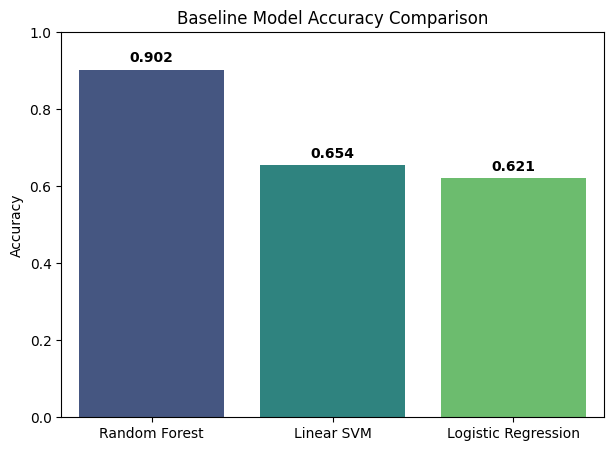

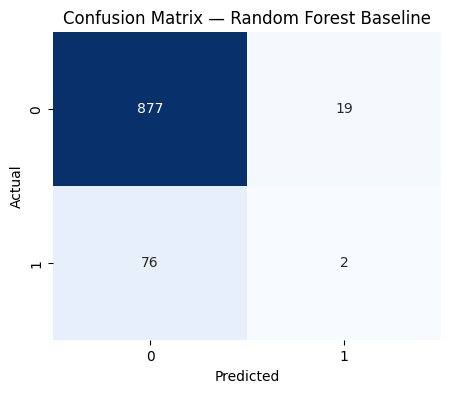

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# 1️⃣ Bar Chart of Model Accuracies
models = ['Random Forest', 'Linear SVM', 'Logistic Regression']
accuracies = [0.902, 0.654, 0.621]  # Baseline accuracies

plt.figure(figsize=(7,5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Baseline Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()


# 2️⃣ Confusion Matrix for Random Forest (Baseline)
# Replace y_test and y_pred with your RF baseline predictions
cm = confusion_matrix(y_test, y_pred)  # y_pred from baseline RF
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix — Random Forest Baseline")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
